In [1]:
import pandas as pd
import numpy as np

In [5]:
df = pd.read_excel("winequality-red.xlsx")

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [7]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [8]:
import matplotlib.pyplot as plt
import seaborn as sbn

<Axes: xlabel='pH', ylabel='count'>

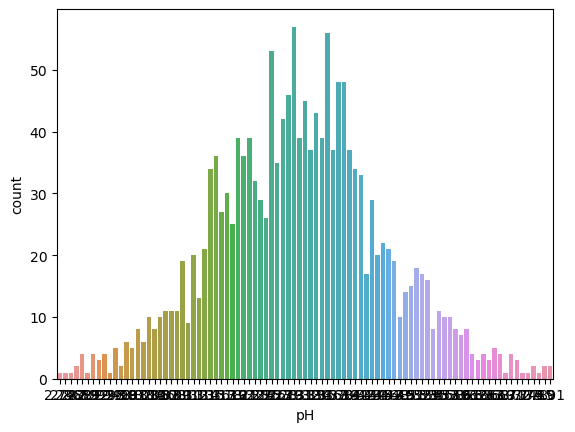

In [9]:
sbn.countplot(x="pH", data=df)

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
y = df["pH"].values
x = df.drop("pH", axis=1).values

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.33,random_state=15)

In [17]:
x_train.shape

(1071, 11)

In [15]:
df.shape

(1599, 12)

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler = MinMaxScaler()

In [20]:
scaler.fit(x_train)

MinMaxScaler()

In [21]:
x_train = scaler.transform(x_train)

In [22]:
x_test = scaler.transform(x_test)

In [23]:
x_train

array([[0.28181818, 0.18493151, 0.15189873, ..., 0.07594937, 0.17857143,
        0.4       ],
       [0.79090909, 0.21232877, 0.73417722, ..., 0.07594937, 0.10714286,
        0.4       ],
       [0.22727273, 0.32191781, 0.01265823, ..., 0.13291139, 0.41071429,
        0.6       ],
       ...,
       [0.28181818, 0.26712329, 0.35443038, ..., 0.23417722, 0.14285714,
        0.4       ],
       [0.29090909, 0.35616438, 0.12658228, ..., 0.20253165, 0.30357143,
        0.8       ],
       [0.09090909, 0.34246575, 0.03797468, ..., 0.15822785, 0.30357143,
        0.2       ]])

In [24]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [26]:
model = Sequential()

model.add(Dense(units=15,activation="relu"))

model.add(Dense(units=15,activation="relu"))

model.add(Dense(units=15,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [27]:
model.fit(x=x_train, y=y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 818us/step - loss: 11.0240
Epoch 2/200
34/34 [==============================] - 0s 788us/step - loss: 6.4718
Epoch 3/200
34/34 [==============================] - 0s 758us/step - loss: 0.9616
Epoch 4/200
34/34 [==============================] - 0s 848us/step - loss: 0.2432
Epoch 5/200
34/34 [==============================] - 0s 818us/step - loss: 0.1714
Epoch 6/200
34/34 [==============================] - 0s 788us/step - loss: 0.1226
Epoch 7/200
34/34 [==============================] - 0s 909us/step - loss: 0.0970
Epoch 8/200
34/34 [==============================] - 0s 939us/step - loss: 0.0833
Epoch 9/200
34/34 [==============================] - 0s 818us/step - loss: 0.0736
Epoch 10/200
34/34 [==============================] - 0s 758us/step - loss: 0.0677
Epoch 11/200
34/34 [==============================] - 0s 788us/step - loss: 0.0606
Epoch 12/200
34/34 [==============================] - 0s 788us/step - loss: 0.0555
Epoch 13/200

34/34 [==============================] - 0s 788us/step - loss: 0.0065
Epoch 100/200
34/34 [==============================] - 0s 788us/step - loss: 0.0065
Epoch 101/200
34/34 [==============================] - 0s 788us/step - loss: 0.0063
Epoch 102/200
34/34 [==============================] - 0s 788us/step - loss: 0.0064
Epoch 103/200
34/34 [==============================] - 0s 727us/step - loss: 0.0062
Epoch 104/200
34/34 [==============================] - 0s 727us/step - loss: 0.0063
Epoch 105/200
34/34 [==============================] - 0s 727us/step - loss: 0.0062
Epoch 106/200
34/34 [==============================] - 0s 727us/step - loss: 0.0062
Epoch 107/200
34/34 [==============================] - 0s 758us/step - loss: 0.0067
Epoch 108/200
34/34 [==============================] - 0s 727us/step - loss: 0.0062
Epoch 109/200
34/34 [==============================] - 0s 788us/step - loss: 0.0063
Epoch 110/200
34/34 [==============================] - 0s 788us/step - loss: 0.0062
Epoch 

34/34 [==============================] - 0s 727us/step - loss: 0.0054
Epoch 197/200
34/34 [==============================] - 0s 727us/step - loss: 0.0053
Epoch 198/200
34/34 [==============================] - 0s 727us/step - loss: 0.0055
Epoch 199/200
34/34 [==============================] - 0s 758us/step - loss: 0.0054
Epoch 200/200
34/34 [==============================] - 0s 758us/step - loss: 0.0056


In [31]:
pd.DataFrame(model.history.history)

,loss
0,11.024036
1,6.471757
2,0.961581
3,0.243151
4,0.171353
...,...
195,0.005358
196,0.005306
197,0.005501
198,0.005395


<Axes: >

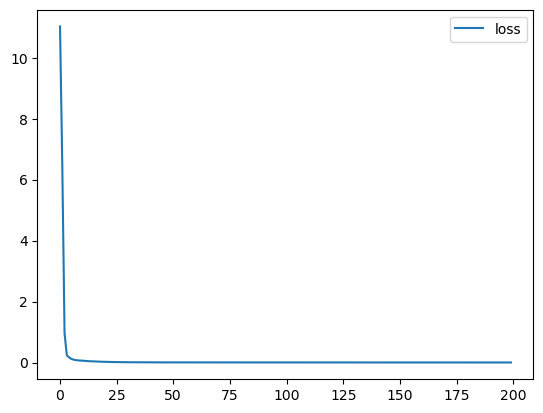

In [32]:
lossesTrain.plot()

In [33]:
model = Sequential()

model.add(Dense(units=5,activation="relu"))

model.add(Dense(units=10,activation="relu"))

model.add(Dense(units=7,activation="relu"))

model.add(Dense(1))

model.compile(optimizer="adam", loss="mse")

In [34]:
model.fit(x=x_train, y=y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 0s 758us/step - loss: 10.7553
Epoch 2/200
34/34 [==============================] - 0s 727us/step - loss: 7.9796
Epoch 3/200
34/34 [==============================] - 0s 727us/step - loss: 4.4640
Epoch 4/200
34/34 [==============================] - 0s 697us/step - loss: 0.8073
Epoch 5/200
34/34 [==============================] - 0s 727us/step - loss: 0.2349
Epoch 6/200
34/34 [==============================] - 0s 727us/step - loss: 0.2078
Epoch 7/200
34/34 [==============================] - 0s 727us/step - loss: 0.1925
Epoch 8/200
34/34 [==============================] - 0s 727us/step - loss: 0.1773
Epoch 9/200
34/34 [==============================] - 0s 727us/step - loss: 0.1616
Epoch 10/200
34/34 [==============================] - 0s 727us/step - loss: 0.1469
Epoch 11/200
34/34 [==============================] - 0s 758us/step - loss: 0.1347
Epoch 12/200
34/34 [==============================] - 0s 727us/step - loss: 0.1225
Epoch 13/200

34/34 [==============================] - 0s 758us/step - loss: 0.0124
Epoch 100/200
34/34 [==============================] - 0s 788us/step - loss: 0.0128
Epoch 101/200
34/34 [==============================] - 0s 727us/step - loss: 0.0130
Epoch 102/200
34/34 [==============================] - 0s 727us/step - loss: 0.0125
Epoch 103/200
34/34 [==============================] - 0s 697us/step - loss: 0.0125
Epoch 104/200
34/34 [==============================] - 0s 667us/step - loss: 0.0124
Epoch 105/200
34/34 [==============================] - 0s 727us/step - loss: 0.0125
Epoch 106/200
34/34 [==============================] - 0s 697us/step - loss: 0.0125
Epoch 107/200
34/34 [==============================] - 0s 727us/step - loss: 0.0124
Epoch 108/200
34/34 [==============================] - 0s 727us/step - loss: 0.0124
Epoch 109/200
34/34 [==============================] - 0s 788us/step - loss: 0.0125
Epoch 110/200
34/34 [==============================] - 0s 788us/step - loss: 0.0126
Epoch 

34/34 [==============================] - 0s 818us/step - loss: 0.0087
Epoch 197/200
34/34 [==============================] - 0s 788us/step - loss: 0.0087
Epoch 198/200
34/34 [==============================] - 0s 727us/step - loss: 0.0083
Epoch 199/200
34/34 [==============================] - 0s 727us/step - loss: 0.0082
Epoch 200/200
34/34 [==============================] - 0s 697us/step - loss: 0.0082


In [35]:
model.history.history

{'loss': [10.755325317382812,
  7.979565143585205,
  4.46401309967041,
  0.8073275685310364,
  0.234923854470253,
  0.20781002938747406,
  0.19254964590072632,
  0.17728079855442047,
  0.1616152822971344,
  0.1469268649816513,
  0.13470962643623352,
  0.1225009635090828,
  0.11139825731515884,
  0.10114824026823044,
  0.09378606081008911,
  0.08422163873910904,
  0.07755877077579498,
  0.07152920961380005,
  0.06480666249990463,
  0.05916251242160797,
  0.05440809205174446,
  0.05015486478805542,
  0.04646137356758118,
  0.04336315393447876,
  0.040168397128582,
  0.0375363789498806,
  0.03512974828481674,
  0.03316054493188858,
  0.03117941878736019,
  0.029455378651618958,
  0.027940474450588226,
  0.026447145268321037,
  0.025118837133049965,
  0.024130037054419518,
  0.023004794493317604,
  0.021901767700910568,
  0.021121205762028694,
  0.020512931048870087,
  0.019769225269556046,
  0.01906130090355873,
  0.018492266535758972,
  0.017787834629416466,
  0.0173861812800169,
  0.016

In [36]:
lossesData = pd.DataFrame(model.history.history)

<Axes: >

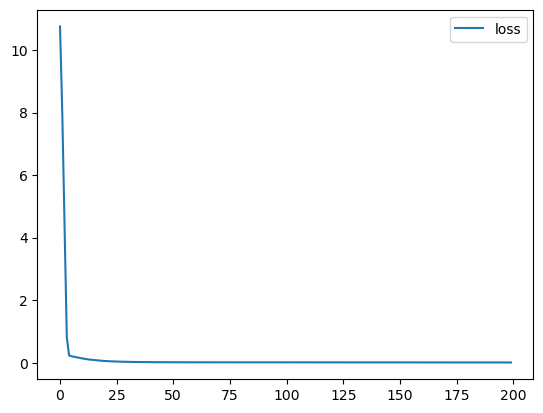

In [37]:
lossesData.plot()

In [38]:
tahminD = model.predict(x_test)

17/17 [==============================] - 0s 687us/step


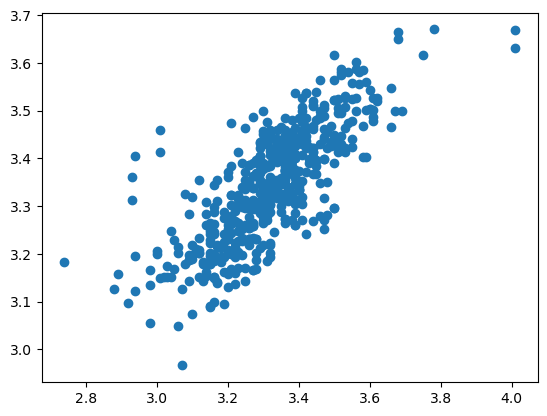

In [39]:
plt.scatter(y_test,tahminD)

In [40]:
tahminD

array([[3.33316  ],
       [3.3941357],
       [3.422696 ],
       [3.215846 ],
       [3.3381336],
       [3.3405538],
       [3.337256 ],
       [3.231415 ],
       [3.1792557],
       [3.4383507],
       [3.1586022],
       [3.4172552],
       [3.2413452],
       [3.4117317],
       [3.335696 ],
       [3.2994785],
       [3.3675787],
       [3.5112345],
       [3.2428937],
       [3.3859699],
       [3.465794 ],
       [3.1504753],
       [3.3999088],
       [3.251319 ],
       [3.278729 ],
       [3.2300308],
       [3.3979416],
       [3.274242 ],
       [3.1611254],
       [3.4103384],
       [3.187883 ],
       [3.3535485],
       [3.4308734],
       [3.2979214],
       [3.1675215],
       [3.484968 ],
       [3.3486347],
       [3.1355462],
       [3.1791217],
       [3.348014 ],
       [3.4984539],
       [3.2414656],
       [3.4591026],
       [3.3610322],
       [3.4048045],
       [3.468557 ],
       [3.4213998],
       [3.526868 ],
       [3.3526287],
       [3.348899 ],


In [41]:
y_test

array([3.4 , 3.45, 3.32, 3.17, 3.34, 3.37, 3.31, 3.26, 3.08, 3.34, 3.2 ,
       3.35, 3.16, 3.38, 3.3 , 3.27, 3.37, 3.47, 3.21, 3.26, 3.42, 3.16,
       3.33, 3.2 , 3.46, 3.2 , 3.47, 3.19, 3.2 , 3.38, 3.28, 3.41, 3.46,
       3.16, 3.28, 3.36, 3.31, 2.98, 3.13, 3.29, 3.69, 3.42, 3.32, 3.32,
       3.29, 3.44, 3.29, 3.53, 3.4 , 3.46, 3.53, 3.58, 3.2 , 3.35, 3.37,
       3.31, 3.22, 3.29, 3.31, 3.52, 3.2 , 3.26, 3.14, 2.98, 3.34, 3.1 ,
       3.41, 3.5 , 4.01, 3.27, 3.41, 3.22, 3.31, 3.47, 3.5 , 3.55, 3.14,
       3.28, 3.1 , 3.61, 3.15, 3.09, 3.39, 3.2 , 3.28, 3.43, 3.45, 3.04,
       3.49, 3.47, 3.25, 3.38, 3.54, 3.39, 3.35, 3.42, 3.4 , 3.41, 3.31,
       3.12, 3.36, 3.46, 3.14, 3.58, 3.34, 3.35, 3.16, 3.27, 3.53, 3.49,
       3.4 , 3.26, 3.29, 3.19, 3.24, 3.31, 3.07, 3.25, 3.45, 3.29, 3.3 ,
       3.36, 3.38, 3.36, 3.23, 3.31, 3.34, 3.47, 3.55, 3.52, 3.16, 3.6 ,
       3.33, 3.4 , 3.36, 3.26, 3.24, 3.21, 3.48, 3.56, 3.3 , 3.47, 3.61,
       3.3 , 3.51, 3.39, 3.16, 3.44, 3.01, 3.25, 3.

In [47]:
gercekveriler = pd.DataFrame(y_test, columns=["Gerçek Veriler"])

In [48]:
gercekveriler

,Gerçek Veriler
0,3.40
1,3.45
2,3.32
3,3.17
4,3.34
...,...
523,3.36
524,3.15
525,3.19
526,3.53


In [50]:
tahminDF = pd.DataFrame(tahminD)

In [51]:
birlestirilmisveriler=pd.concat([gercekveriler, tahminDF], axis=1)

In [53]:
birlestirilmisveriler.columns = ["Gerçek Veriler", "Tahminler"]

,Gerçek Veriler,Tahminler
0,3.40,3.333160
1,3.45,3.394136
2,3.32,3.422696
3,3.17,3.215846
4,3.34,3.338134
...,...,...
523,3.36,3.406352
524,3.15,3.258292
525,3.19,3.288344
526,3.53,3.462730


In [67]:
model.fit(x=x_train, y=y_train, epochs=300)

Epoch 1/300
34/34 [==============================] - 0s 758us/step - loss: 0.0063
Epoch 2/300
34/34 [==============================] - 0s 727us/step - loss: 0.0063
Epoch 3/300
34/34 [==============================] - 0s 727us/step - loss: 0.0059
Epoch 4/300
34/34 [==============================] - 0s 697us/step - loss: 0.0058
Epoch 5/300
34/34 [==============================] - 0s 758us/step - loss: 0.0060
Epoch 6/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 7/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 8/300
34/34 [==============================] - 0s 727us/step - loss: 0.0059
Epoch 9/300
34/34 [==============================] - 0s 758us/step - loss: 0.0059
Epoch 10/300
34/34 [==============================] - 0s 727us/step - loss: 0.0063
Epoch 11/300
34/34 [==============================] - 0s 758us/step - loss: 0.0057
Epoch 12/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 13/300


34/34 [==============================] - 0s 727us/step - loss: 0.0061
Epoch 100/300
34/34 [==============================] - 0s 727us/step - loss: 0.0058
Epoch 101/300
34/34 [==============================] - 0s 727us/step - loss: 0.0061
Epoch 102/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 103/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 104/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 105/300
34/34 [==============================] - 0s 697us/step - loss: 0.0059
Epoch 106/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 107/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 108/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 109/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 110/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 

34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 197/300
34/34 [==============================] - 0s 727us/step - loss: 0.0059
Epoch 198/300
34/34 [==============================] - 0s 727us/step - loss: 0.0056
Epoch 199/300
34/34 [==============================] - 0s 697us/step - loss: 0.0056
Epoch 200/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 201/300
34/34 [==============================] - 0s 727us/step - loss: 0.0060
Epoch 202/300
34/34 [==============================] - 0s 727us/step - loss: 0.0058
Epoch 203/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 204/300
34/34 [==============================] - 0s 727us/step - loss: 0.0059
Epoch 205/300
34/34 [==============================] - 0s 727us/step - loss: 0.0059
Epoch 206/300
34/34 [==============================] - 0s 697us/step - loss: 0.0057
Epoch 207/300
34/34 [==============================] - 0s 697us/step - loss: 0.0058
Epoch 

34/34 [==============================] - 0s 727us/step - loss: 0.0058
Epoch 294/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 295/300
34/34 [==============================] - 0s 697us/step - loss: 0.0058
Epoch 296/300
34/34 [==============================] - 0s 727us/step - loss: 0.0057
Epoch 297/300
34/34 [==============================] - 0s 697us/step - loss: 0.0059
Epoch 298/300
34/34 [==============================] - 0s 727us/step - loss: 0.0058
Epoch 299/300
34/34 [==============================] - 0s 697us/step - loss: 0.0056
Epoch 300/300
34/34 [==============================] - 0s 697us/step - loss: 0.0059


In [68]:
nNewLosses = pd.DataFrame(model.history.history)

<Axes: >

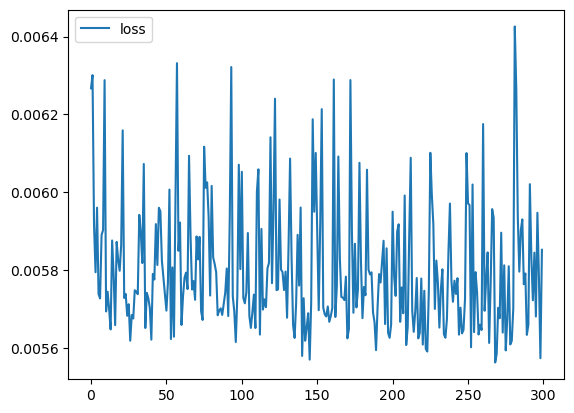

In [69]:
nNewLosses.plot()

In [70]:
NNEWD = model.predict(x_test)

17/17 [==============================] - 0s 625us/step


In [71]:
newdata = pd.DataFrame(NNEWD)

In [72]:
multipledata = pd.concat([gercekveriler,newdata],axis=1)

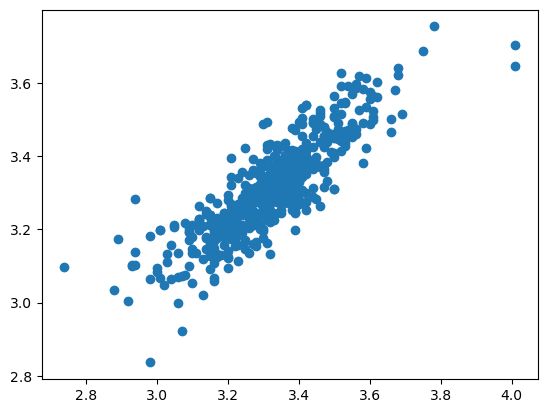

In [73]:
plt.scatter(y_test,newdata)

In [74]:
multipledata.columns = ["Gerçek Veriler", "Tahminler"]

In [75]:
multipledata

,Gerçek Veriler,Tahminler
0,3.40,3.311133
1,3.45,3.281810
2,3.32,3.329737
3,3.17,3.196663
4,3.34,3.285422
...,...,...
523,3.36,3.342820
524,3.15,3.238639
525,3.19,3.218438
526,3.53,3.469039
